In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:

def task_1(image_path):
    # 1. Read the image
    image = cv2.imread(image_path)
    
    # 2. Convert BGR to RGB for correct color representation
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")
    plt.show()
    
    # 3. Extract Image Size
    height, width, channels = image.shape
    print(f"Image Size: {width}x{height}, Channels: {channels}")
    
    # 4. Calculate total pixels
    total_pixels = height * width
    print(f"Total Pixels: {total_pixels}")
    
    # 5. Convert RGB to Grayscale
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("grayscale_image.jpg", grayscale)
    plt.imshow(grayscale, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis("off")
    plt.show()
    
    # 6. Convert Grayscale to Binary using Thresholding
    _, binary = cv2.threshold(grayscale, 127, 255, cv2.THRESH_BINARY)
    cv2.imwrite("binary_image.jpg", binary)
    plt.imshow(binary, cmap='gray')
    plt.title("Binary Image")
    plt.axis("off")
    plt.show()
    
    # Counting Black Pixels
    black_pixels = np.sum(binary == 0)
    print(f"Black Pixel Area: {black_pixels}, Image Size: {total_pixels}")


In [4]:
def task_2(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # 1. Edge Detection
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobel_x, sobel_y)
    
    prewitt_x = cv2.filter2D(image, -1, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
    prewitt_y = cv2.filter2D(image, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
    prewitt = cv2.magnitude(prewitt_x.astype(float), prewitt_y.astype(float))
    
    roberts_x = cv2.filter2D(image, -1, np.array([[1, 0], [0, -1]]))
    roberts_y = cv2.filter2D(image, -1, np.array([[0, 1], [-1, 0]]))
    roberts = cv2.magnitude(roberts_x.astype(float), roberts_y.astype(float))
    
    canny = cv2.Canny(image, 100, 200)
    
    # Display results
    edge_methods = {"Sobel": sobel, "Prewitt": prewitt, "Roberts": roberts, "Canny": canny}
    for key, edge_img in edge_methods.items():
        plt.imshow(edge_img, cmap='gray')
        plt.title(f"{key} Edge Detection")
        plt.axis("off")
        plt.show()
    
    # 2. Image Segmentation
    _, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    edges = cv2.Canny(image, 100, 200)
    
    # Watershed Segmentation
    ret, markers = cv2.connectedComponents(global_thresh)
    markers = markers + 1
    markers[edges == 255] = 0
    watershed_image = cv2.watershed(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), markers)
    
    # Display results
    seg_methods = {"Global Thresholding": global_thresh, "Adaptive Thresholding": adaptive_thresh, "Canny Segmentation": edges, "Watershed": watershed_image}
    for key, seg_img in seg_methods.items():
        plt.imshow(seg_img, cmap='gray')
        plt.title(f"{key} Segmentation")
        plt.axis("off")
        plt.show()

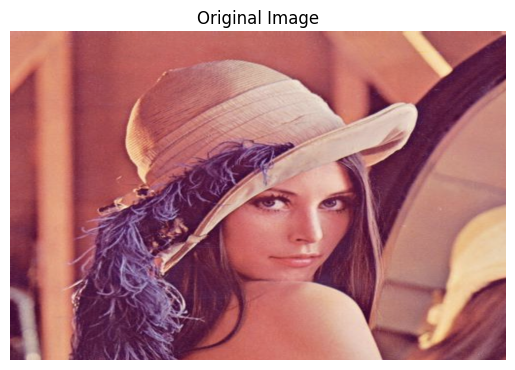

Image Size: 856x567, Channels: 3
Total Pixels: 485352


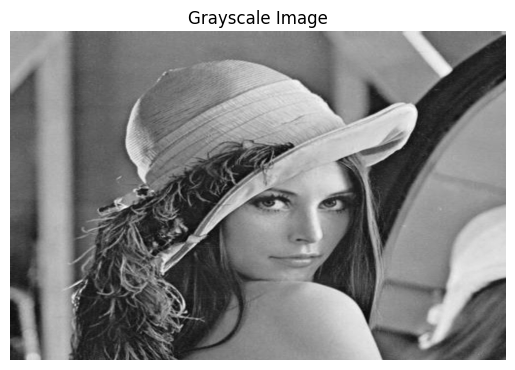

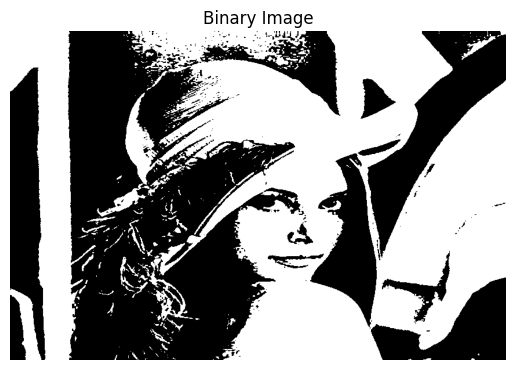

Black Pixel Area: 237943, Image Size: 485352


In [5]:
# Example Usage
task_1("rgb.png")
#task_2("rgb.png")


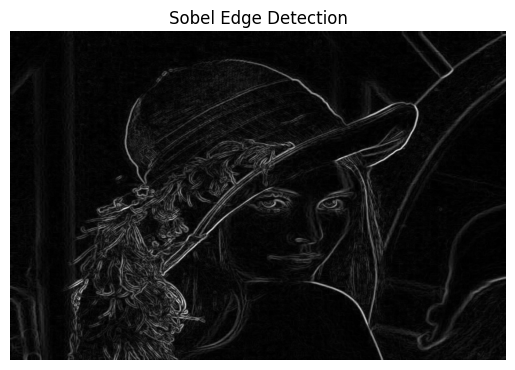

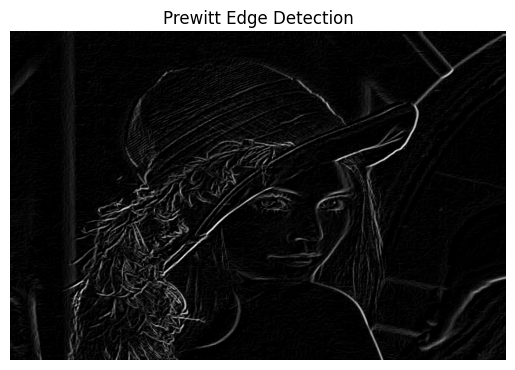

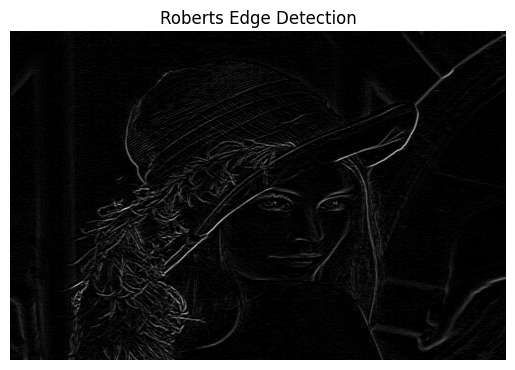

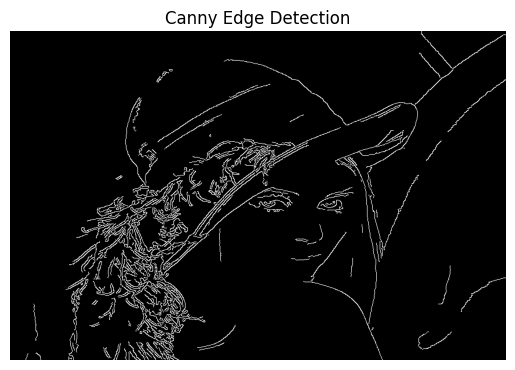

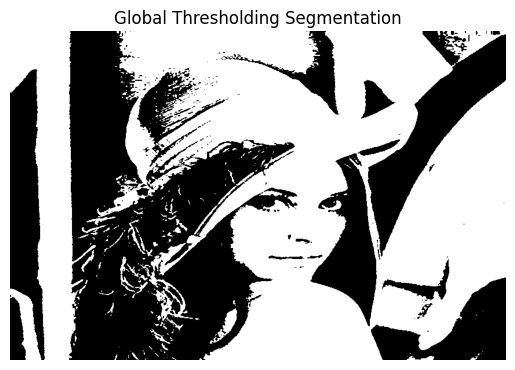

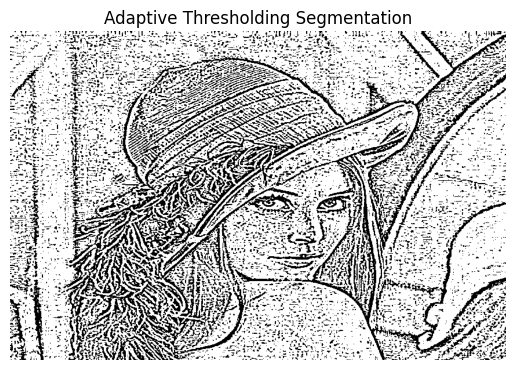

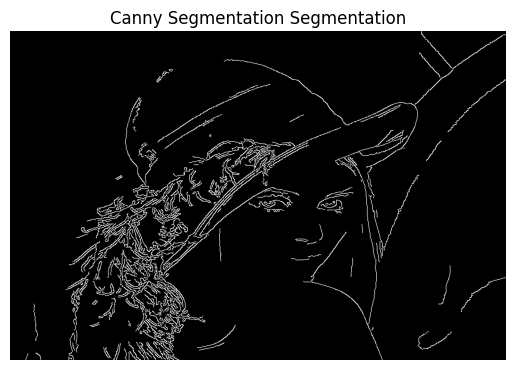

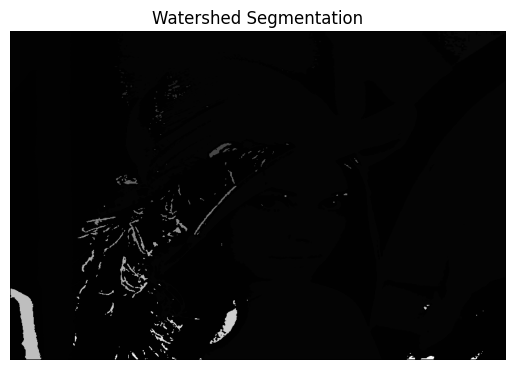

In [6]:
task_2("rgb.png")